# Project 2 : Hidden Markov models and optimal control
Authors : Simon Vandergooten and Clémence Vandamme.

In this second project, you will implement a Hidden Markov Model with 3 states and apply to your posterior probabilities optimal control. In other words, based on your knowledge and uncertainties, you will decide the optimal actions you need to take in any situation.

## Context :
The belgian government is trying to develop a new strategy to differentiate between patients with hypertension and those with hypotension in order to help preventing fainting and cardiac arrest.

Patients can be in one of the three following states : healthy, hypertension or hypotension. The patient's health status is represented by the vector $S$, where each value $s_t$ represents the patient's status in day $t$. The government also provides you the transition probabilities between each state, based on data from the national public health department.

You received the blood pressure measurements of 5 patients for 150 days. Those measurements are made with a new state-of-the-art tool. However, the design of this tool is not perfect (yet) and the measurements are very imprecise. Based on these data, you are asked to provide the probabilities of each state (hypertension, hypotension and healthy) at each timestep for the 5 patients.

Furthermore, two drugs are available on the market. One aims to lower the blood pressure, the other increases it. At each moment, you need to determine if you should take a drug and which one. However, take into account that these drugs have a cost and that taking a drug when healthy represents a risk to make the situation worse.  

## Practical information:
### HMM

The following graph sums up the different states and their transition probabilities. **The initial state is healthy**.

<img alt='Solution hint' align='center' width=450 height=450 src=https://raw.githubusercontent.com/svandergoote/LGBIO2060-2021/master/Solutions/Projet2_2022.png>


### Measurements

Concerning the measurements $m_t$, the systolic blood pressure levels are distributed as follow:

* $m_t \sim \mathcal{N}$(120, $\sigma_{healthy}^2$) if $s_t$ = 'healthy'.

* $m_t \sim \mathcal{N}$(160, $\sigma_{hyper}^2$) if $s_t$ = 'hyper'.

* $m_t \sim \mathcal{N}$(80, $\sigma_{hypo}^2$) if $s_t$ = 'hypo'.

Where $\sigma_{healthy}, \, \sigma_{hyper}, \, \sigma_{hypo}=27, \, 30\, , 28$  are the measurement noise related to the new tool.



### Potential actions and their effects

Each day, you have 3 options:
- Take a drug A
    - It has 80% chances to **lower** your tension to 120 if you suffer from **hypertension**. (Therefore, 20% chances to have no effect).
    - It has 40% chance to **lower** your tension to 80 if you were **healthy**.
    - It has **no effect** if you suffer from **hypotension**.

- Take a drug B
    - It has 80% chances to **increase** your tension to 120 if you suffer from **hypotension**.
    - It has 40% chances to **increase** your tension to 160 if you were **healthy**.
    - It has **no effect** if you suffer from **hypertension**.

- Do nothing: no effect on your blood pressure in any state.

VERY IMPORTANT NOTE : The action has no impact on the state transition and the state itself. It should only be the most appropropriate action based on your belief about the state. For example, if a patient has hypertension today, takes the drug A and recovers a normal tension; tomorrow's state will be based on the fact that the patient had hypertension today. In other words, you can first estimate all states, then compute independently the most appropriate actions.


### Utility and cost
Utility values associated to blood pressure:
- 120 mmHg : U = +2
- 160 mmHg : U = -2 (risk of heart attack)
- 80 mmHg : U = -1 (risk of fainting)

Costs:
- Drug A : 2
- Drug B : 2







## Guidelines

**READ THIS PART CAREFULLY**

For the first part of the project, you are asked to estimate the posterior probability of each state at any time, based on the measurements vector M and on the transition probabilities. M contains 150 measurements. Then, graphically represent the evolution of these probabilities. The way you plot these data is up to you, make it readable and interpretable (you do not necessarily have to represent all the time steps).


In the second part, determine the policy you will follow at each time step to choose the optimal action. Based on this policy, return the vector of actions taken for the given data. A policy must be optimal in the sense that it maximizes the benefit (utility) and minimizes the cost. It simply consists in setting a threshold on your posterior belief. For example, "*if I have more than 65% probability to have hypertension, I will take drug A*" is a policy. We give you the 100 first true states to test different policies (i.e, different thresholds) and determine which one is the best. Indeed, with the true states, you can determine the impact of your actions and compute both the benefit and the cost.
After finding your optimal policy, you can look at the actions chosen for your measures for which you do not have the true states (i.e the last 50 measurements).


Finally, discuss the impact of some relevant parameters of the model. For exemple, what do you observe in the policy and selected actions if the cost of both drugs increase ? Also, do the thresholds depends on the subjects ? Why ?



### To sum up:

1) Create your HMM and compute the posterior probabilities associated to each state based on the measurements.

2) Graphically represent the evolution of the posteriors.

3) Define an optimal policy (this answer must appear clearly).  

4) Based on your policy, determine the drug to take at each time step for the given data.

5) Discuss the impact of the parameters of the model on the policy and the resulting actions.


### Data:

- The vector $S$ containing the 100 first hidden states $s_t$:
  * $s_t$ = 'healthy' if the patient's state is healthy for day $t$
  * $s_t$ = 'hyper' if the patient's state is hypertension for day $t$
  * $s_t$ = 'hypo' if the patient's state is hypotension for day $t$

  It must be only used to determine the optimal policy. **It cannot be used for the HMM**.

- The vector $M$ containing 150 measurements $m_t$. It is a vector of scalars.

### Submission
Like for the first project, you must submit your notebook with all your answers.

The **deadline is the Thurday 30 November 22:00**. Name your notebook as follow : "LGBIO2060_Projet2_Grxx".

Don't forget to register for a timeslot for the oral evaluation.

# Project 2: Group 5
---
**Modelling of biological systems**

👥 Authors: Gabriel de Morais and Gabriela Ishikawa

## 🧮 1. Create your HMM and compute the posterior probabilities associated to each state based on the measurements.

To start Project 2, we began by importing the libraries that will be used and the data from the .csv files. A seed was used to make the random numbers predictable.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'M.csv'

# Data from CSV file - 4 rows, one for each patient
M = pd.read_csv('M.csv').values
S = pd.read_csv('S_training.csv').values

# M[:,0] and S[:,0] is not a value 
M = np.delete(M, 0, axis=1)
S = np.delete(S, 0, axis=1)

From the information provided in the statement, the following variables were defined with the necessary parameters for the project's execution. Instead of using the commonly used -1, 0, 1, or 0, 1, 2 for states, we chose to identify the states as 120, 160, and 80, which represent the blood pressures corresponding to a healthy individual, hypertension, and hypotension, respectively. The transition matrix models the transition probabilities between states based on the provided diagram. It is observed that in the same row, the probabilities add up to one since they represent mutually exclusive events: the probability of staying in state A, the probability of transitioning from A to B, and the probability of transitioning from A to C.

In [90]:
# Set parameters
means = np.array([120, 160, 80])     # healthy, hyper, hypo

# Initial state = 'healthy'
start_proba = np.array([1, 0, 0])

# Transition matrix
T = np.array([[0.3, 0.4, 0.3], [0.35, 0.5, 0.15], [0.6, 0.1, 0.3]])

# Variances
var = np.array([27*27, 30*30, 28*28])

nsteps = len(M[0])

The `sample` function takes into account the condition, that is, healthy, hypertensive, or hypotensive, to compute a random value from a Gaussian distribution with mean `means` and variance `var`. This value represents the blood pressure measurement, which is not perfect, having associated errors.

In [91]:
def sample(means, var, S, seed=0):
  np.random.seed(seed)
  # Initialize measurements vector M
  M = np.zeros(len(S))

  # Calculate measurements conditioned on the latent states 
  for i in range(len(S)):
    if S[i] == 120:
      M[i] = np.random.normal(means[0], np.sqrt(var[0]))
    elif S[i] == 160:
      M[i] = np.random.normal(means[1], np.sqrt(var[1]))
    elif S[i] == 80:
      M[i] = np.random.normal(means[2], np.sqrt(var[2]))

  return M

The `compute_likelihood` function calculates the likelihood from the measurements vector. The function uses given statistical parameters, such as means and variances for each condition. The returned result, L, is an array containing the conditional probabilities of the measurement M for each of the three health conditions. These probabilities are calculated using the probability density function of a normal distribution for each condition.

In [92]:
def compute_likelihood(means, var, M):

  p_healthy = norm(loc=means[0], scale=np.sqrt(var[0]))
  p_hyper = norm(loc=means[1], scale=np.sqrt(var[1]))
  p_hypo = norm(loc=means[2], scale=np.sqrt(var[2]))
  L = np.stack([p_healthy.pdf(M), p_hyper.pdf(M), p_hypo.pdf(M)], axis=0)
  if L.size == 3:
    L = L.flatten()

  return L


To compute the state $t$ from the state $t-1$, we use the `one_step_update` function. In this function, the posterior of the previous state is multiplied by the transition matrix to calculate the predictive probabilities. To calculate the posterior, we multiply the predictive probabilities by the likelihood calculated by the `compute_likelihood` function.

In [93]:
def one_step_update(T, posterior_tm1, M_t, means, var):

  # Calculate predictive probabilities (prior)
  prediction = posterior_tm1 @ T

  # Get the likelihood 
  likelihood = compute_likelihood(means, var, M_t)

  # Calculate posterior
  posterior_t = prediction * likelihood
  # Normalize
  posterior_t /= np.sum(posterior_t)

  return prediction, likelihood, posterior_t

To compute the posterior probabilities associated to each state, the `simulate_forward_inference` is used. It initializes the variables with the values given in the instructions, then the function `one_step_update` to compute the predictive probabilities, likelihoods and the posterior probabilities of the next steps.

In [94]:
def simulate_forward_inference(means, var, T, startProba, N, data):

  # Initialize arrays
  predictive_probs = np.zeros((N,3))
  likelihoods = np.zeros((N,3))
  posterior_probs = np.zeros((N,3))

  # Start with the first element
  predictive_probs[0,:] = startProba
  likelihoods[0,:] = compute_likelihood(means, var, data[0])
  posterior = predictive_probs[0,:] * likelihoods[0,:]
  posterior /= np.sum(posterior)
  posterior_probs[0,:] = posterior

  # Then iterate for the rest of the N elements
  for t in range(1, N):
    prediction, likelihood, posterior = one_step_update(T, posterior_probs[t-1], data[t], means, var) 
    # Normalize and add to the list
    posterior /= np.sum(posterior)
    predictive_probs[t,:] = prediction
    likelihoods[t,:] = likelihood
    posterior_probs[t,:] = posterior

  return predictive_probs, likelihoods, posterior_probs

Finally, the last stage of this part consists of computing the posterior for each of the 5 patients, based on the imported data and the parameters provided. These posteriors will be used to plot the graphs and evaluate the medication decision policy.

In [95]:
def calculate_posteriors(means, var, T, start_proba, nsteps, measurements):
    posteriors = []
    for measurement in measurements:
        _, _, posterior = simulate_forward_inference(means, var, T, start_proba, nsteps, measurement)
        posteriors.append(posterior)
    return posteriors

posteriors_HMM = calculate_posteriors(means, var, T, start_proba, nsteps, M)

## 📊 2. Graphically represent the evolution of the posteriors.

Following the computation of posteriors, the subsequent graph illustrates their progression across each patient.

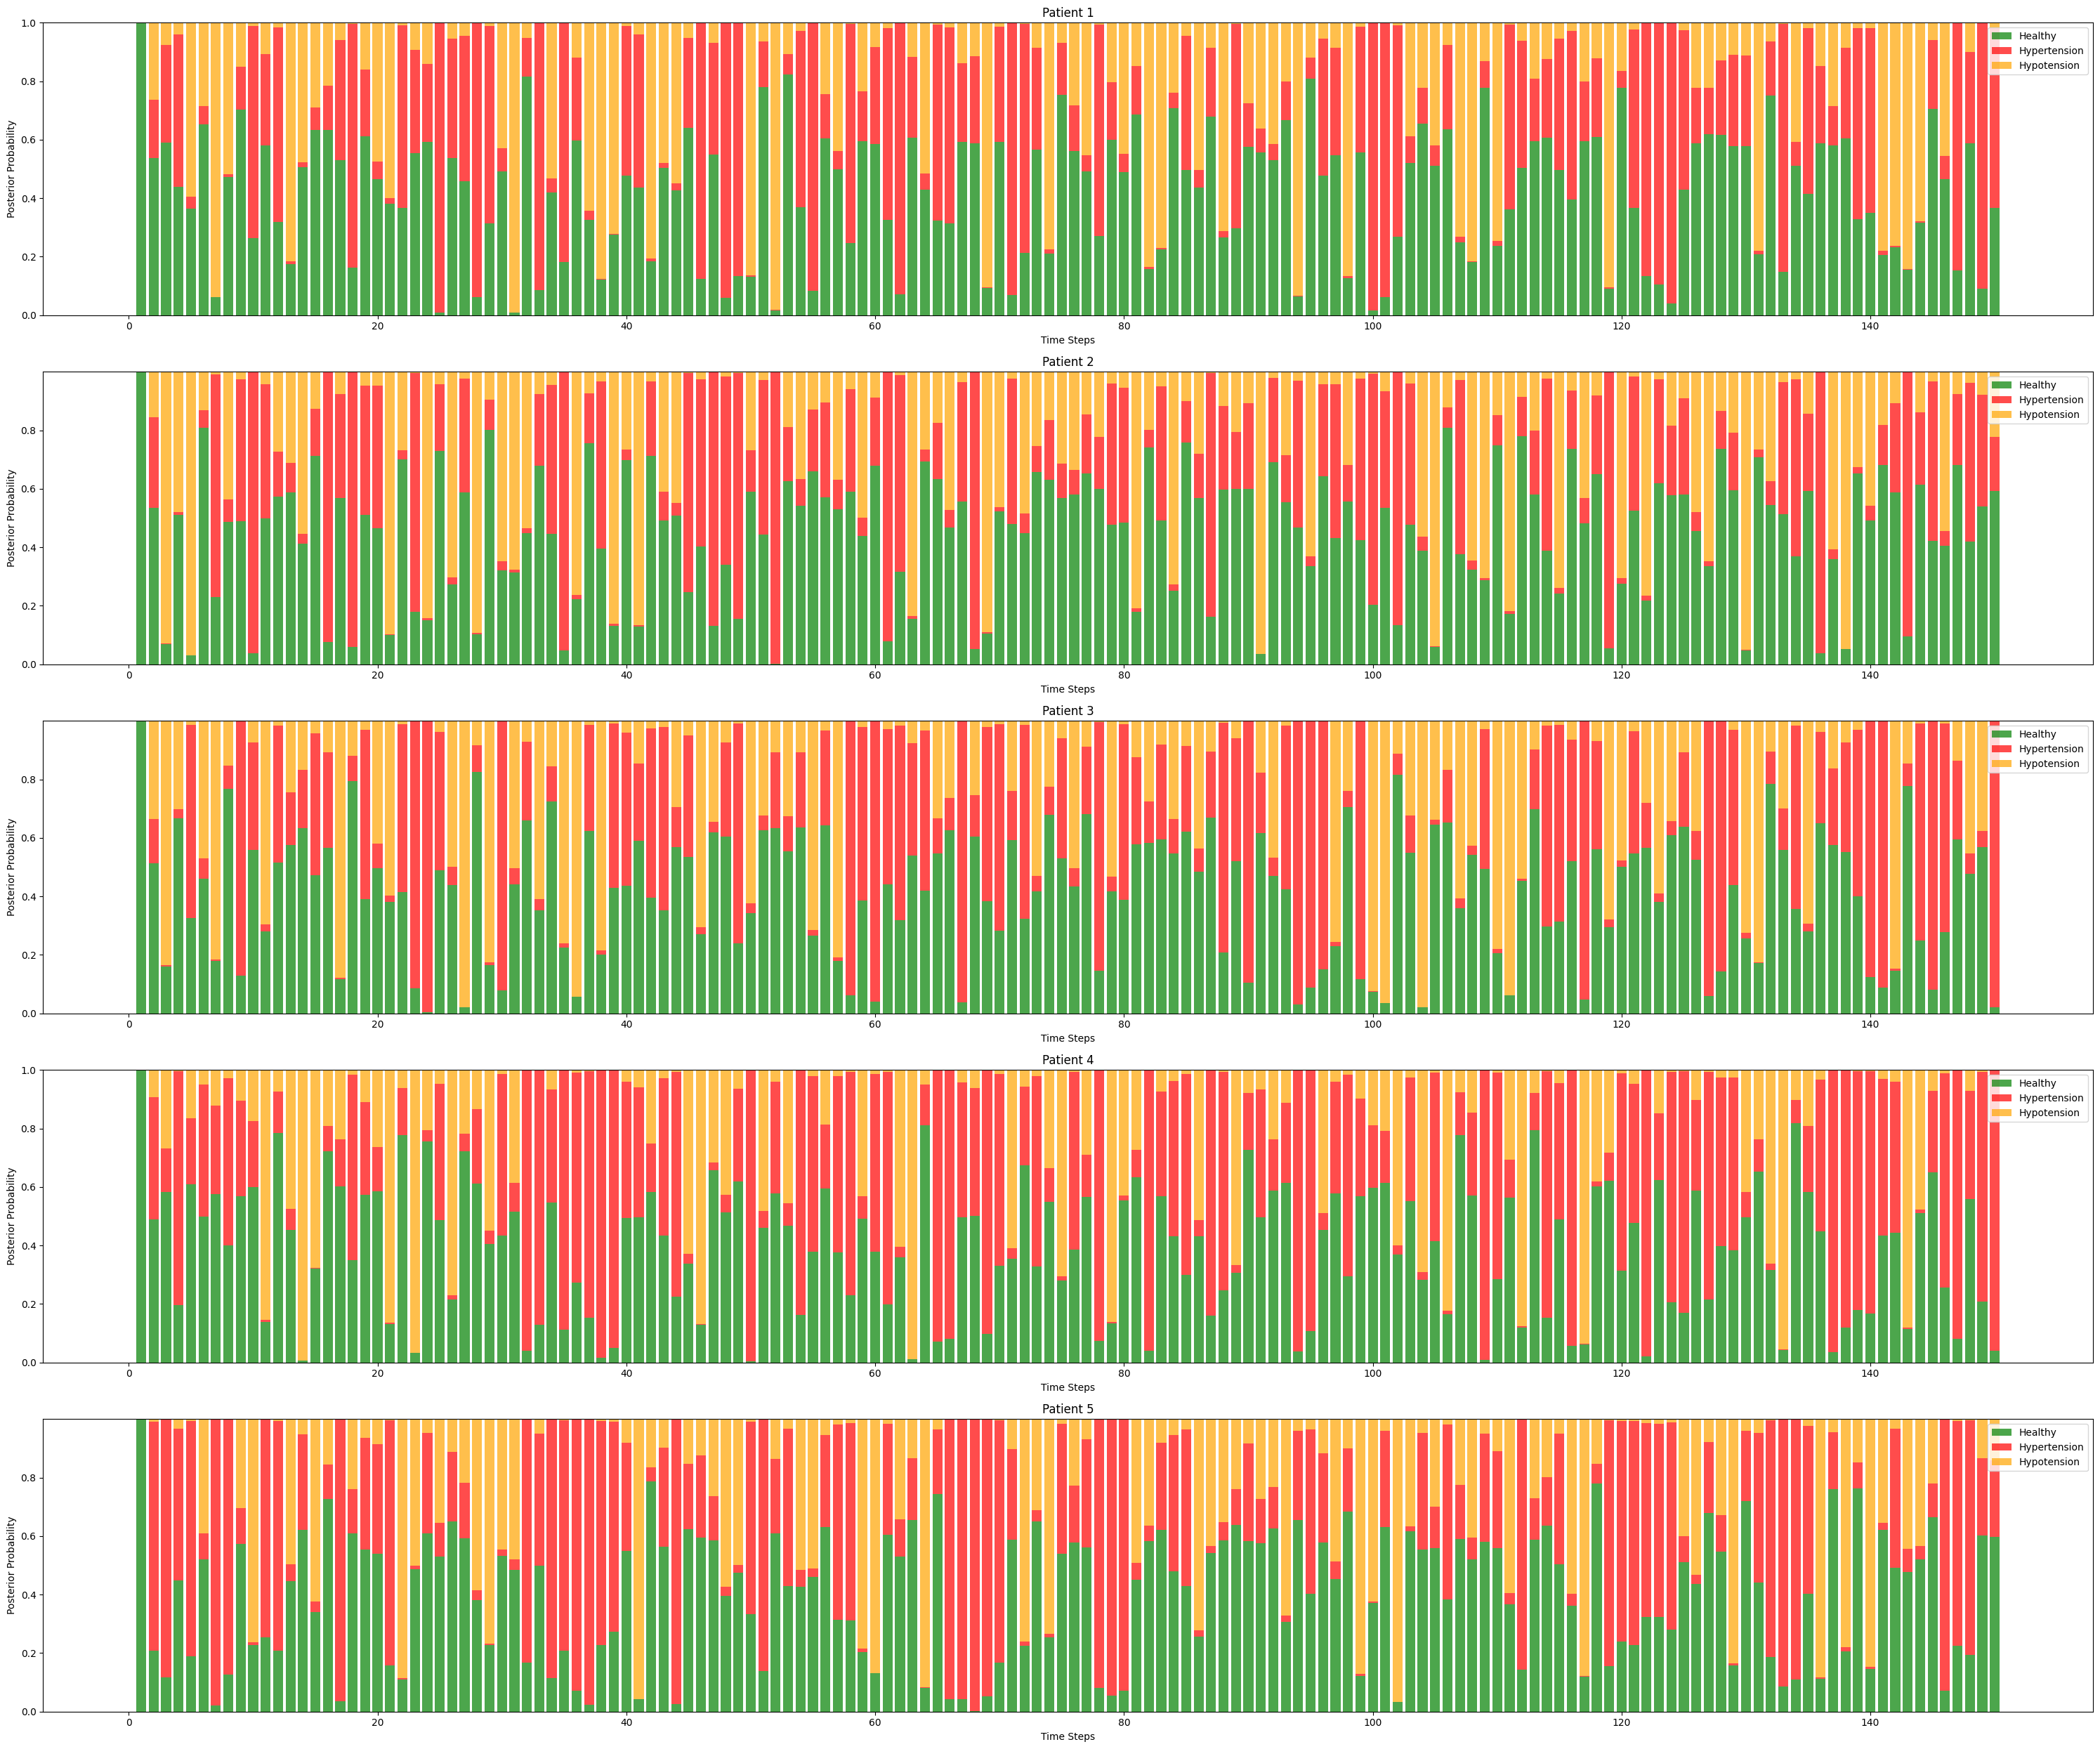

In [96]:
time_steps = np.linspace(1, 150, 150)

# Define health states and corresponding colors
health_states = ["Healthy", "Hypertension", "Hypotension"]
colors = ["green", "red", "orange"]

# Create subplots for each patient's posterior probabilities
fig, axs = plt.subplots(len(posteriors_HMM), 1, figsize=(30, 5 * len(posteriors_HMM)))

# Iterate over each patient's posterior probabilities
for i, posterior_probs in enumerate(posteriors_HMM):
    ax = axs[i]  # Get the corresponding axis for the current subplot
    
    # Plot posterior probabilities for each health state
    bottom = np.zeros_like(time_steps)
    for j in range(len(health_states)):
        ax.bar(time_steps, posterior_probs[:, j], bottom=bottom, label=health_states[j], color=colors[j], alpha=0.7)
        bottom += posterior_probs[:, j]
    
    ax.legend(loc="upper right")
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Posterior Probability')
    ax.set_title(f'Patient {i + 1}')  # Set title for each subplot

plt.tight_layout()
plt.show()

The `generate_posteriors_states` function provides the states and measurements derived from the HMM posteriors.

In [97]:
def generate_posteriors_states(posteriors_HMM, means, var, seed=0):
    np.random.seed(seed)
    posteriors_M = []
    posteriors_S = []
    
    for i in range(5):
        new_M = np.zeros(150)
        posterior_probs = posteriors_HMM[i]

        for j in range(len(posterior_probs)):
            new_M[j] = np.random.choice([120, 160, 80], p=posterior_probs[j])

        posteriors_S.append(new_M)
        new_M = sample(means, var, new_M)
        posteriors_M.append(new_M)
    
    return posteriors_M, posteriors_S

def map_values(mapping, values):
    result = []
    for value in values:
        for key, mapped_value in mapping.items():
            if value == mapped_value:
                result.append(key)
                break
    return result

In [98]:
mapping = {'healthy': 120, 'hyper': 160, 'hypo': 80}
values = [120, 120, 80, 160]

def map_values(mapping, values):
    result = []
    for value in values:
        for key, mapped_value in mapping.items():
            if value == mapped_value:
                result.append(key)
                break
    return result

result_vector = map_values(mapping, values)
print(result_vector)

['healthy', 'healthy', 'hypo', 'hyper']


For a clear visualization of the posteriors derived from the Hidden Markov Model (HMM) analysis, the following plots have been generated to compare the results.

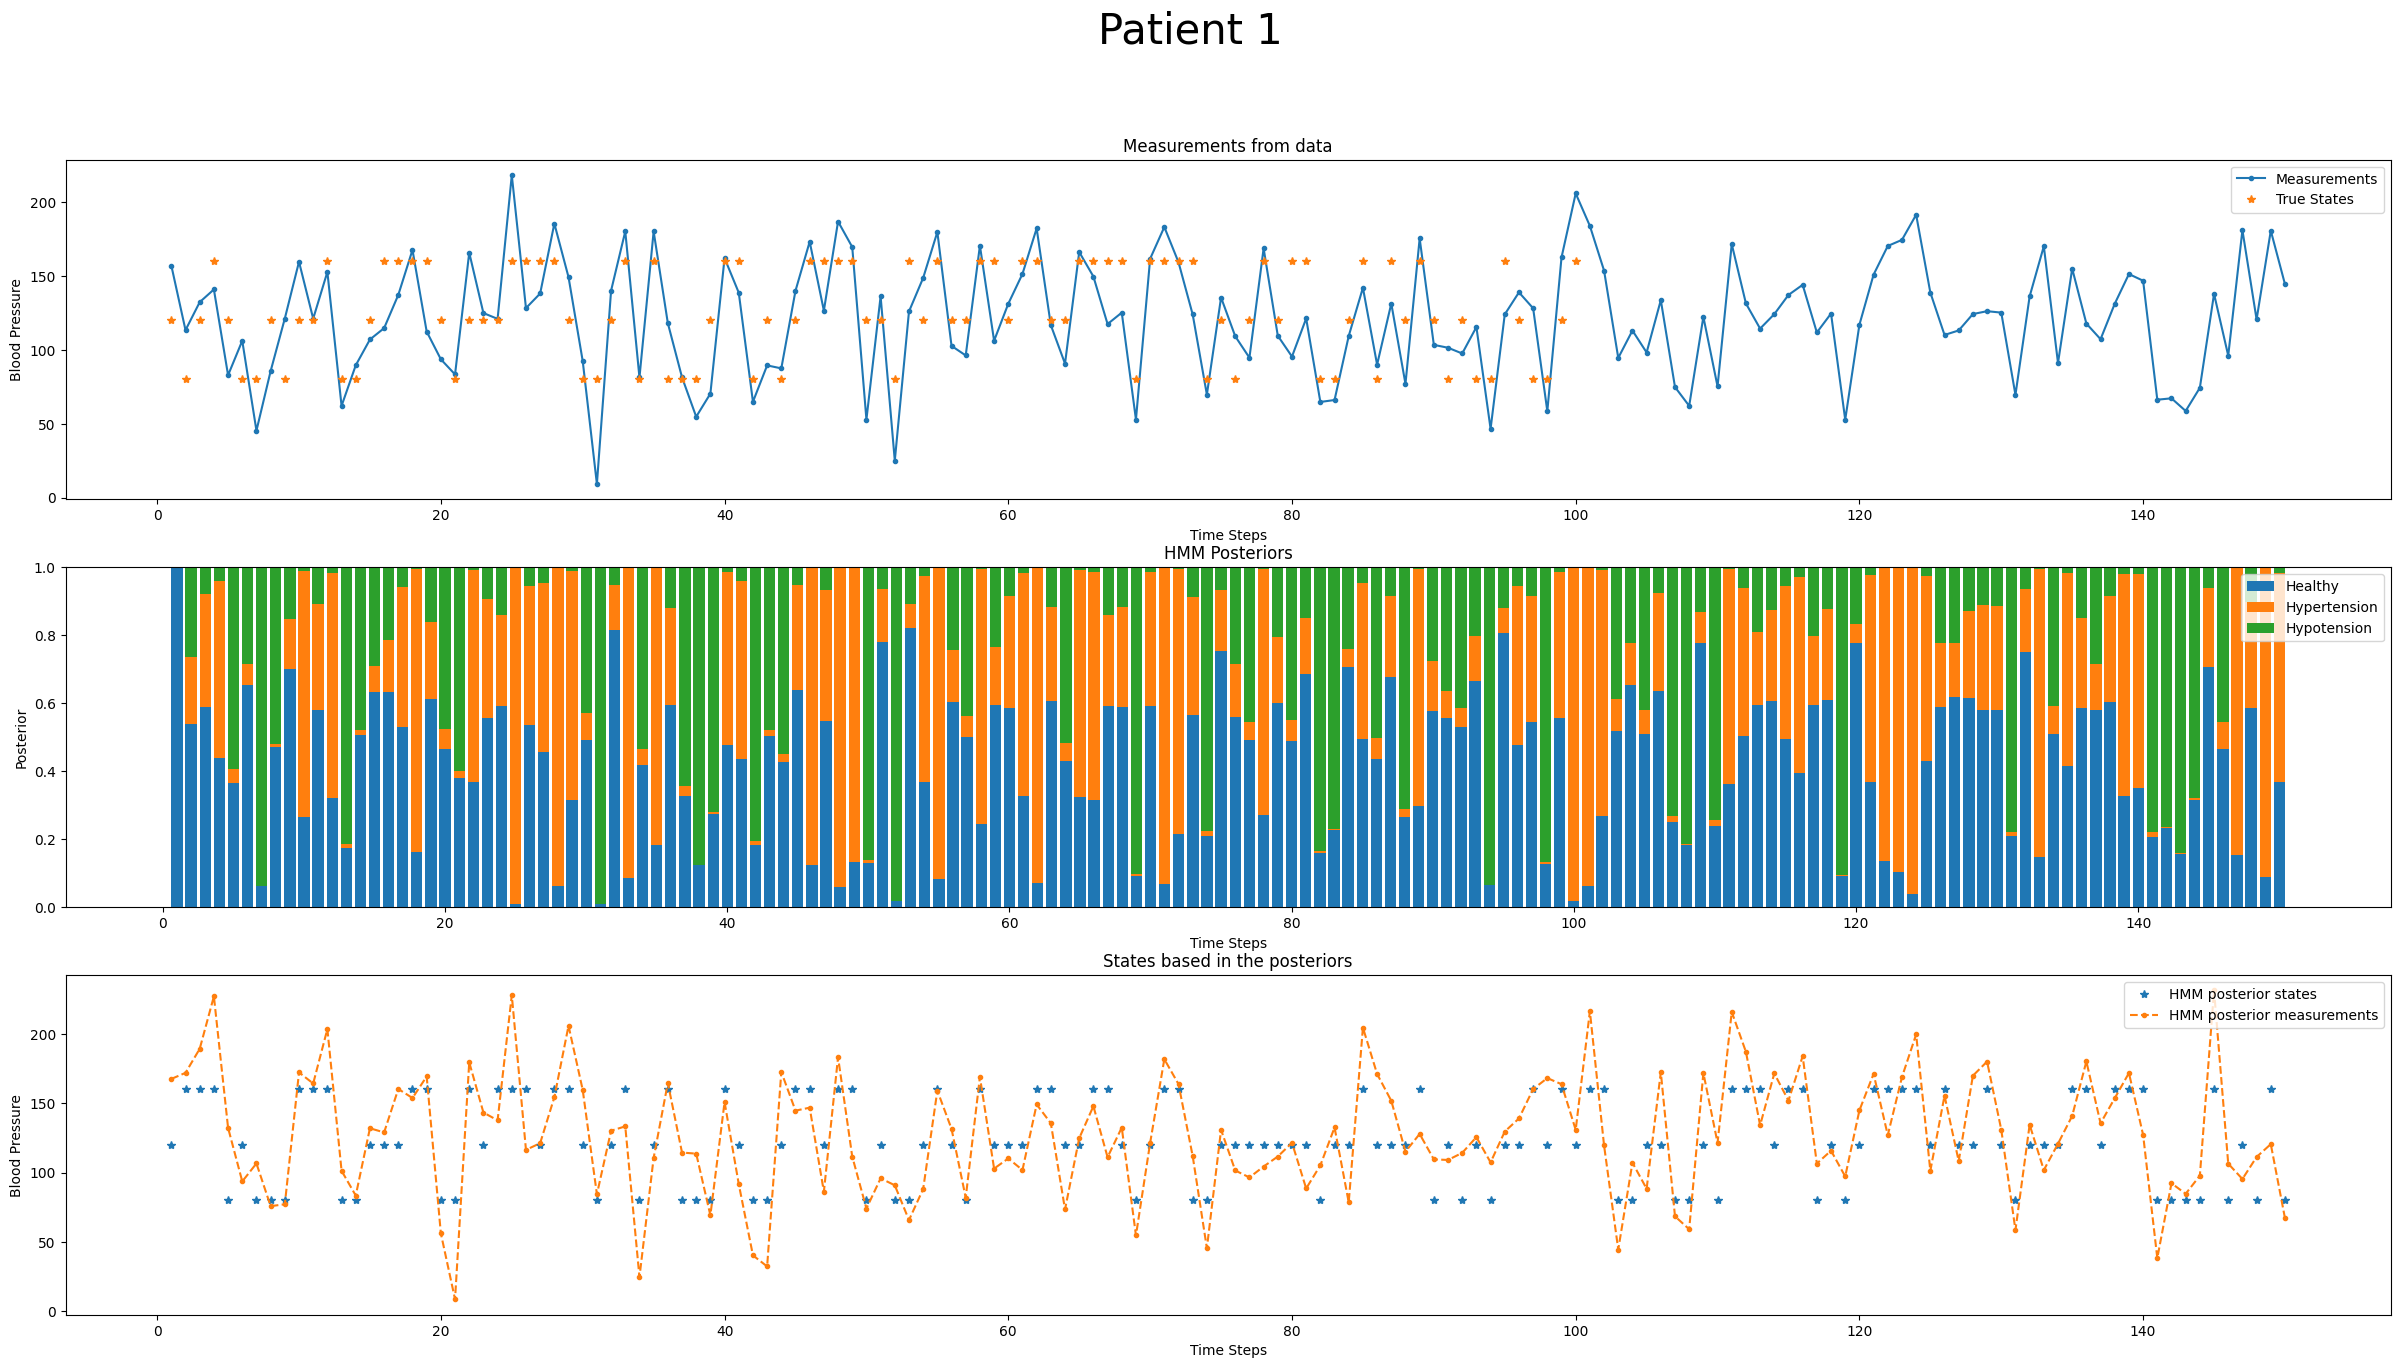

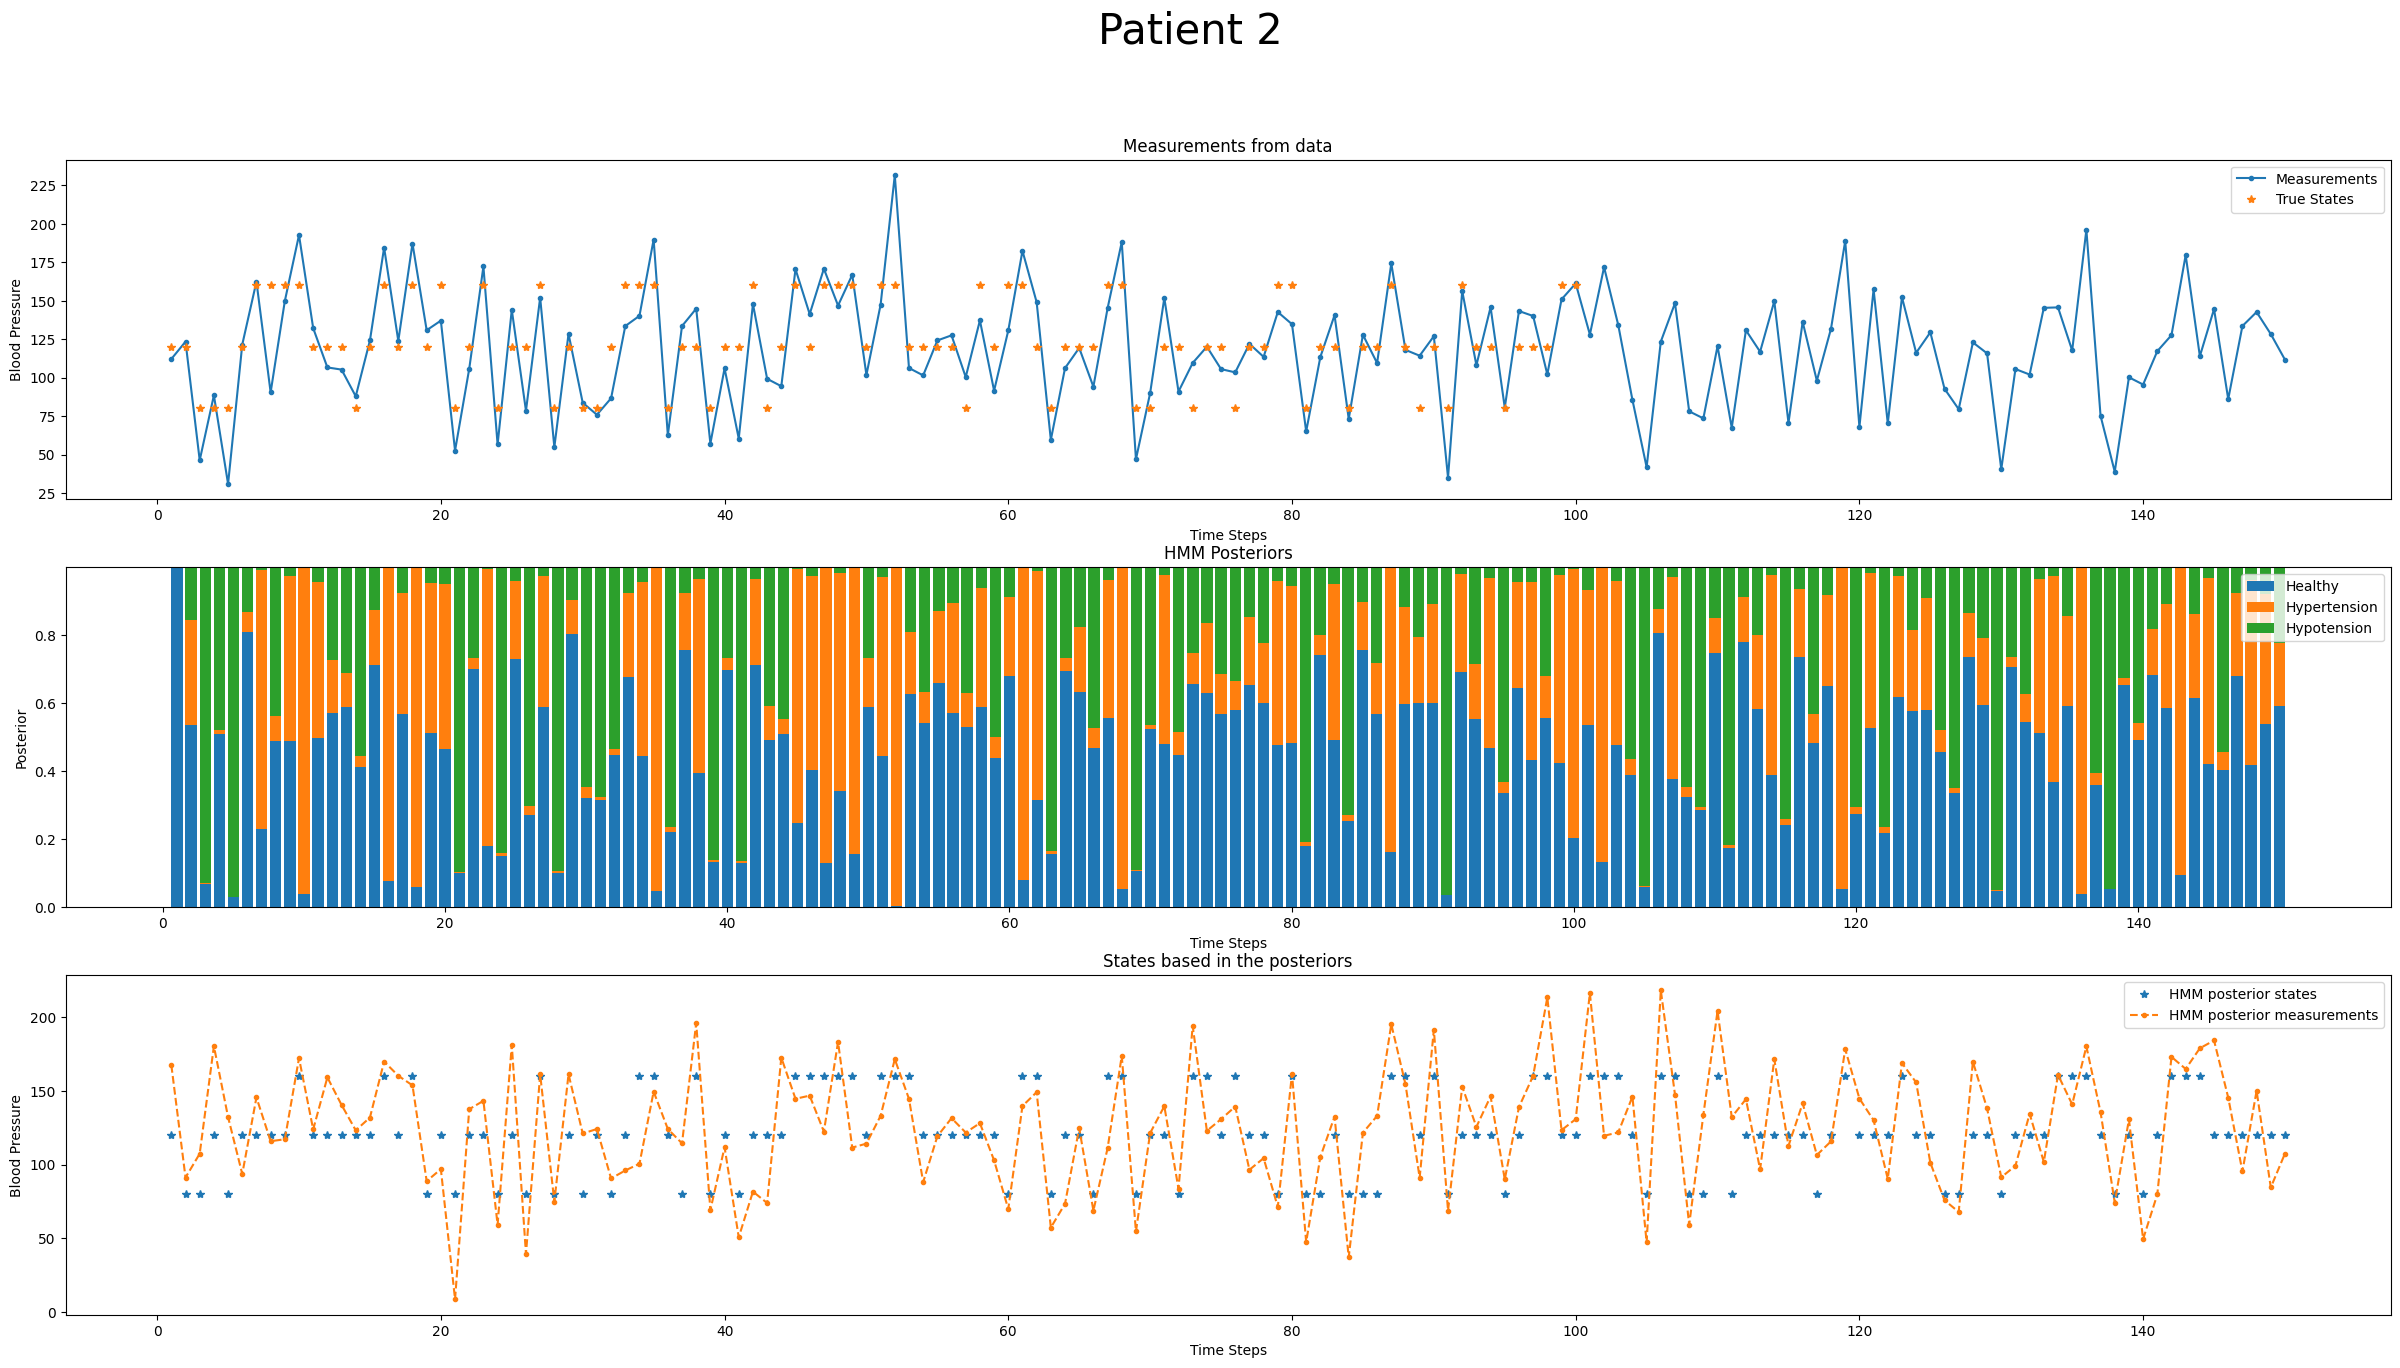

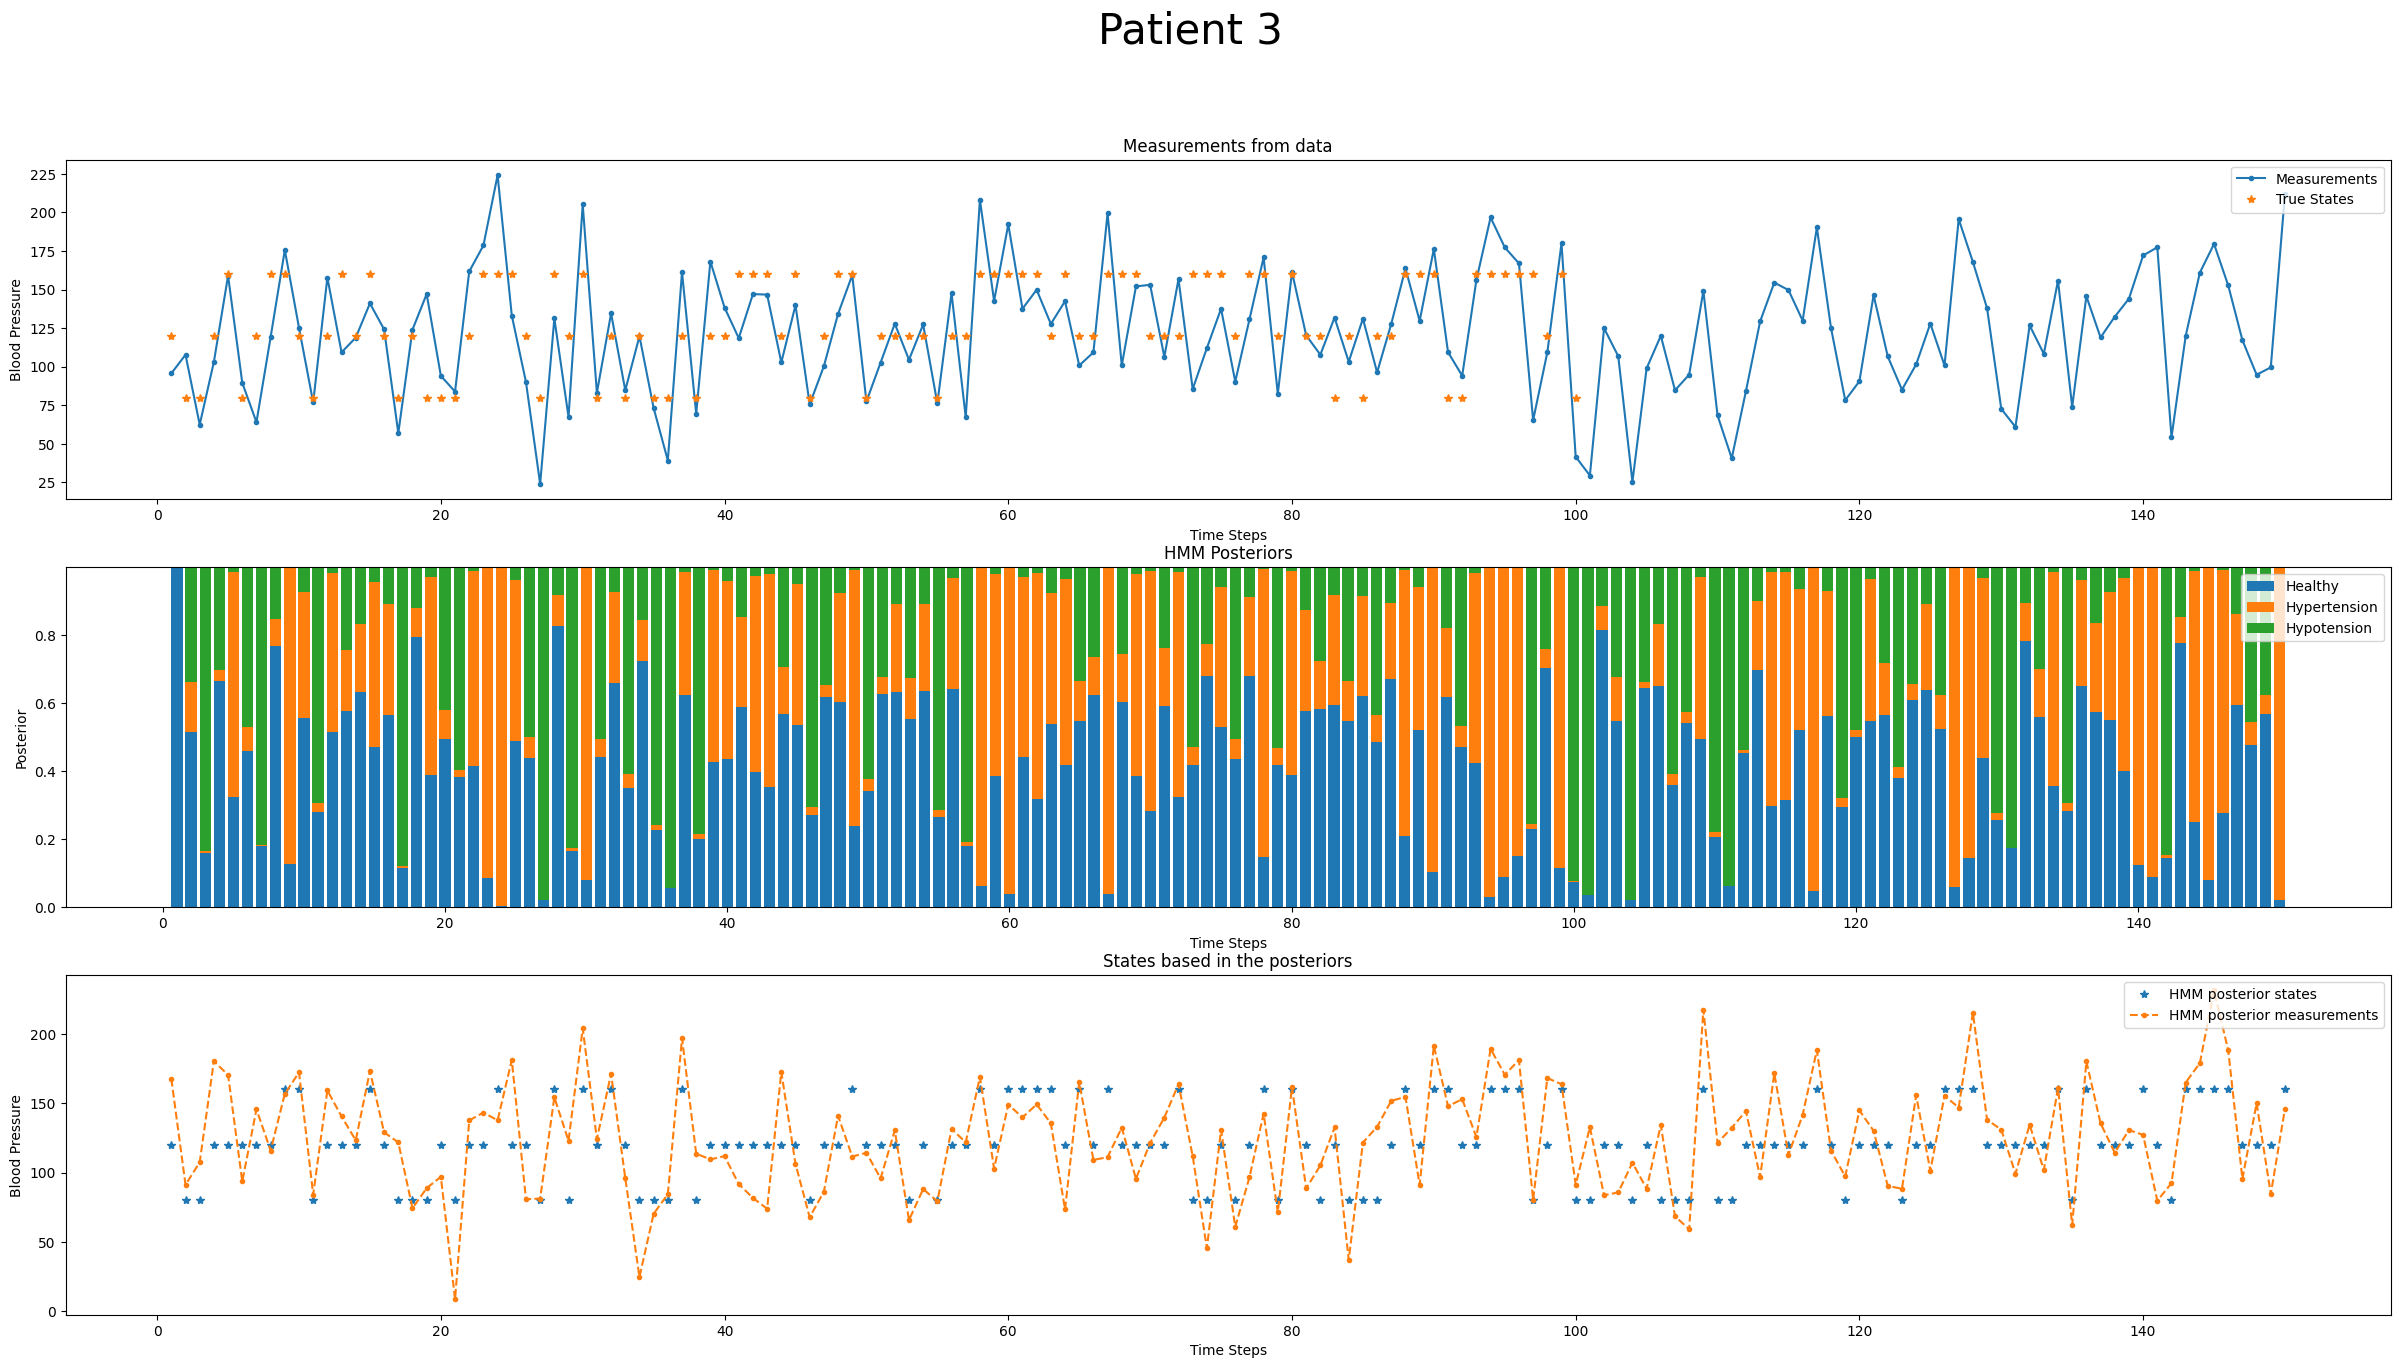

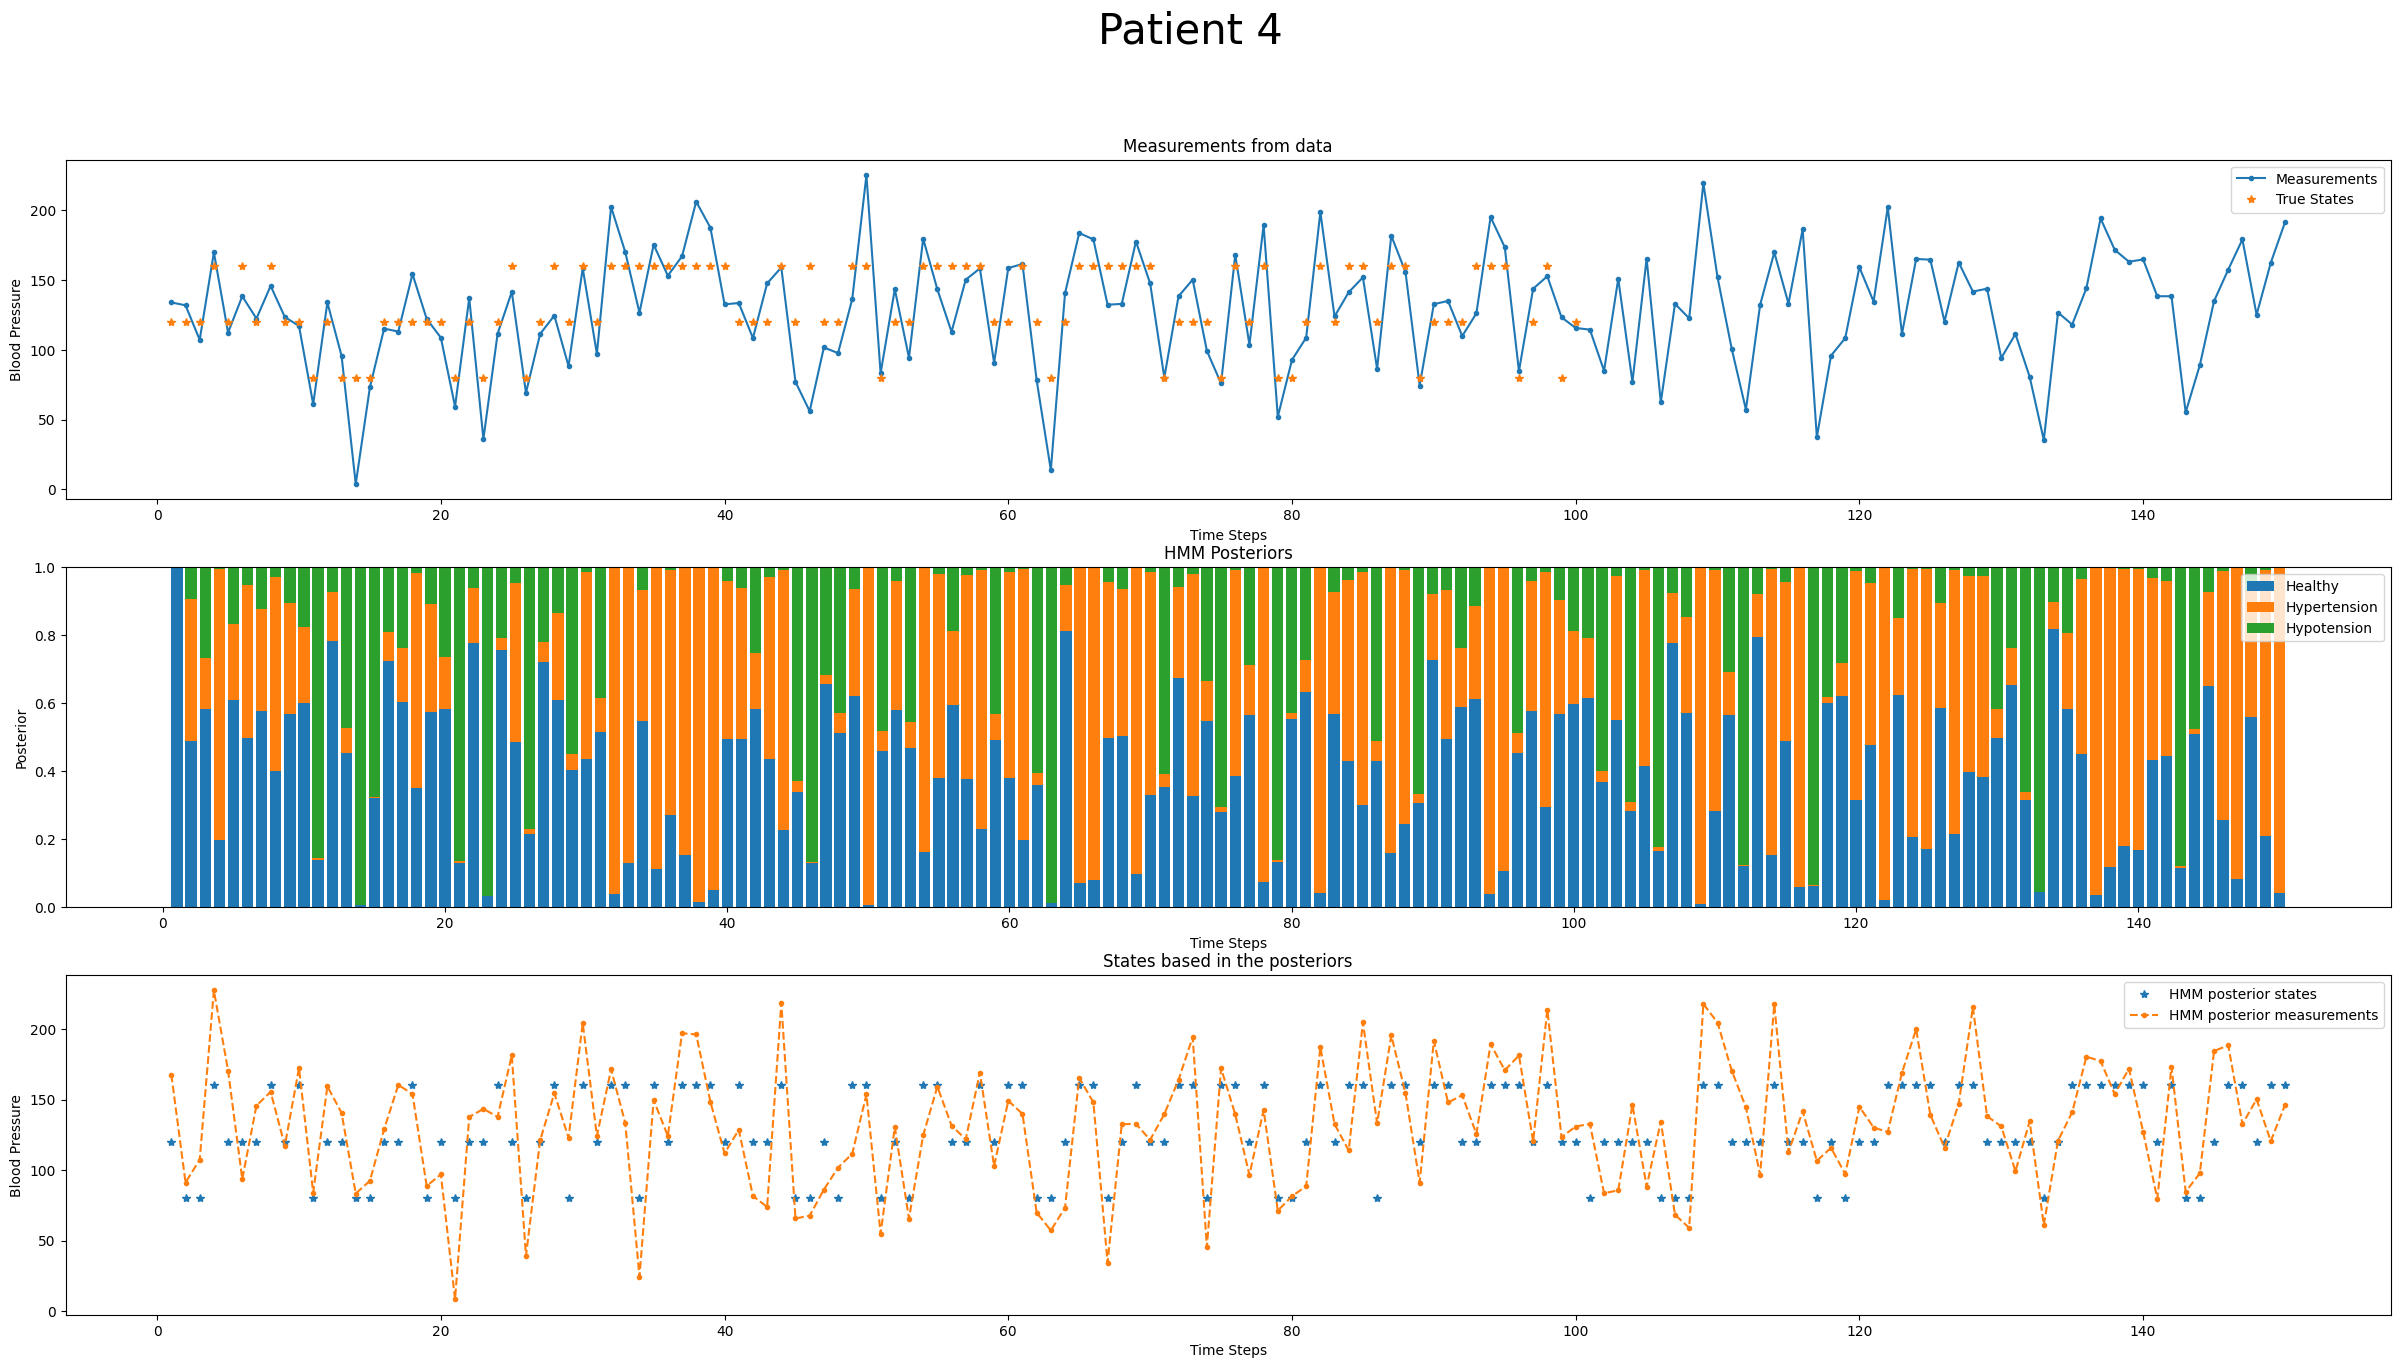

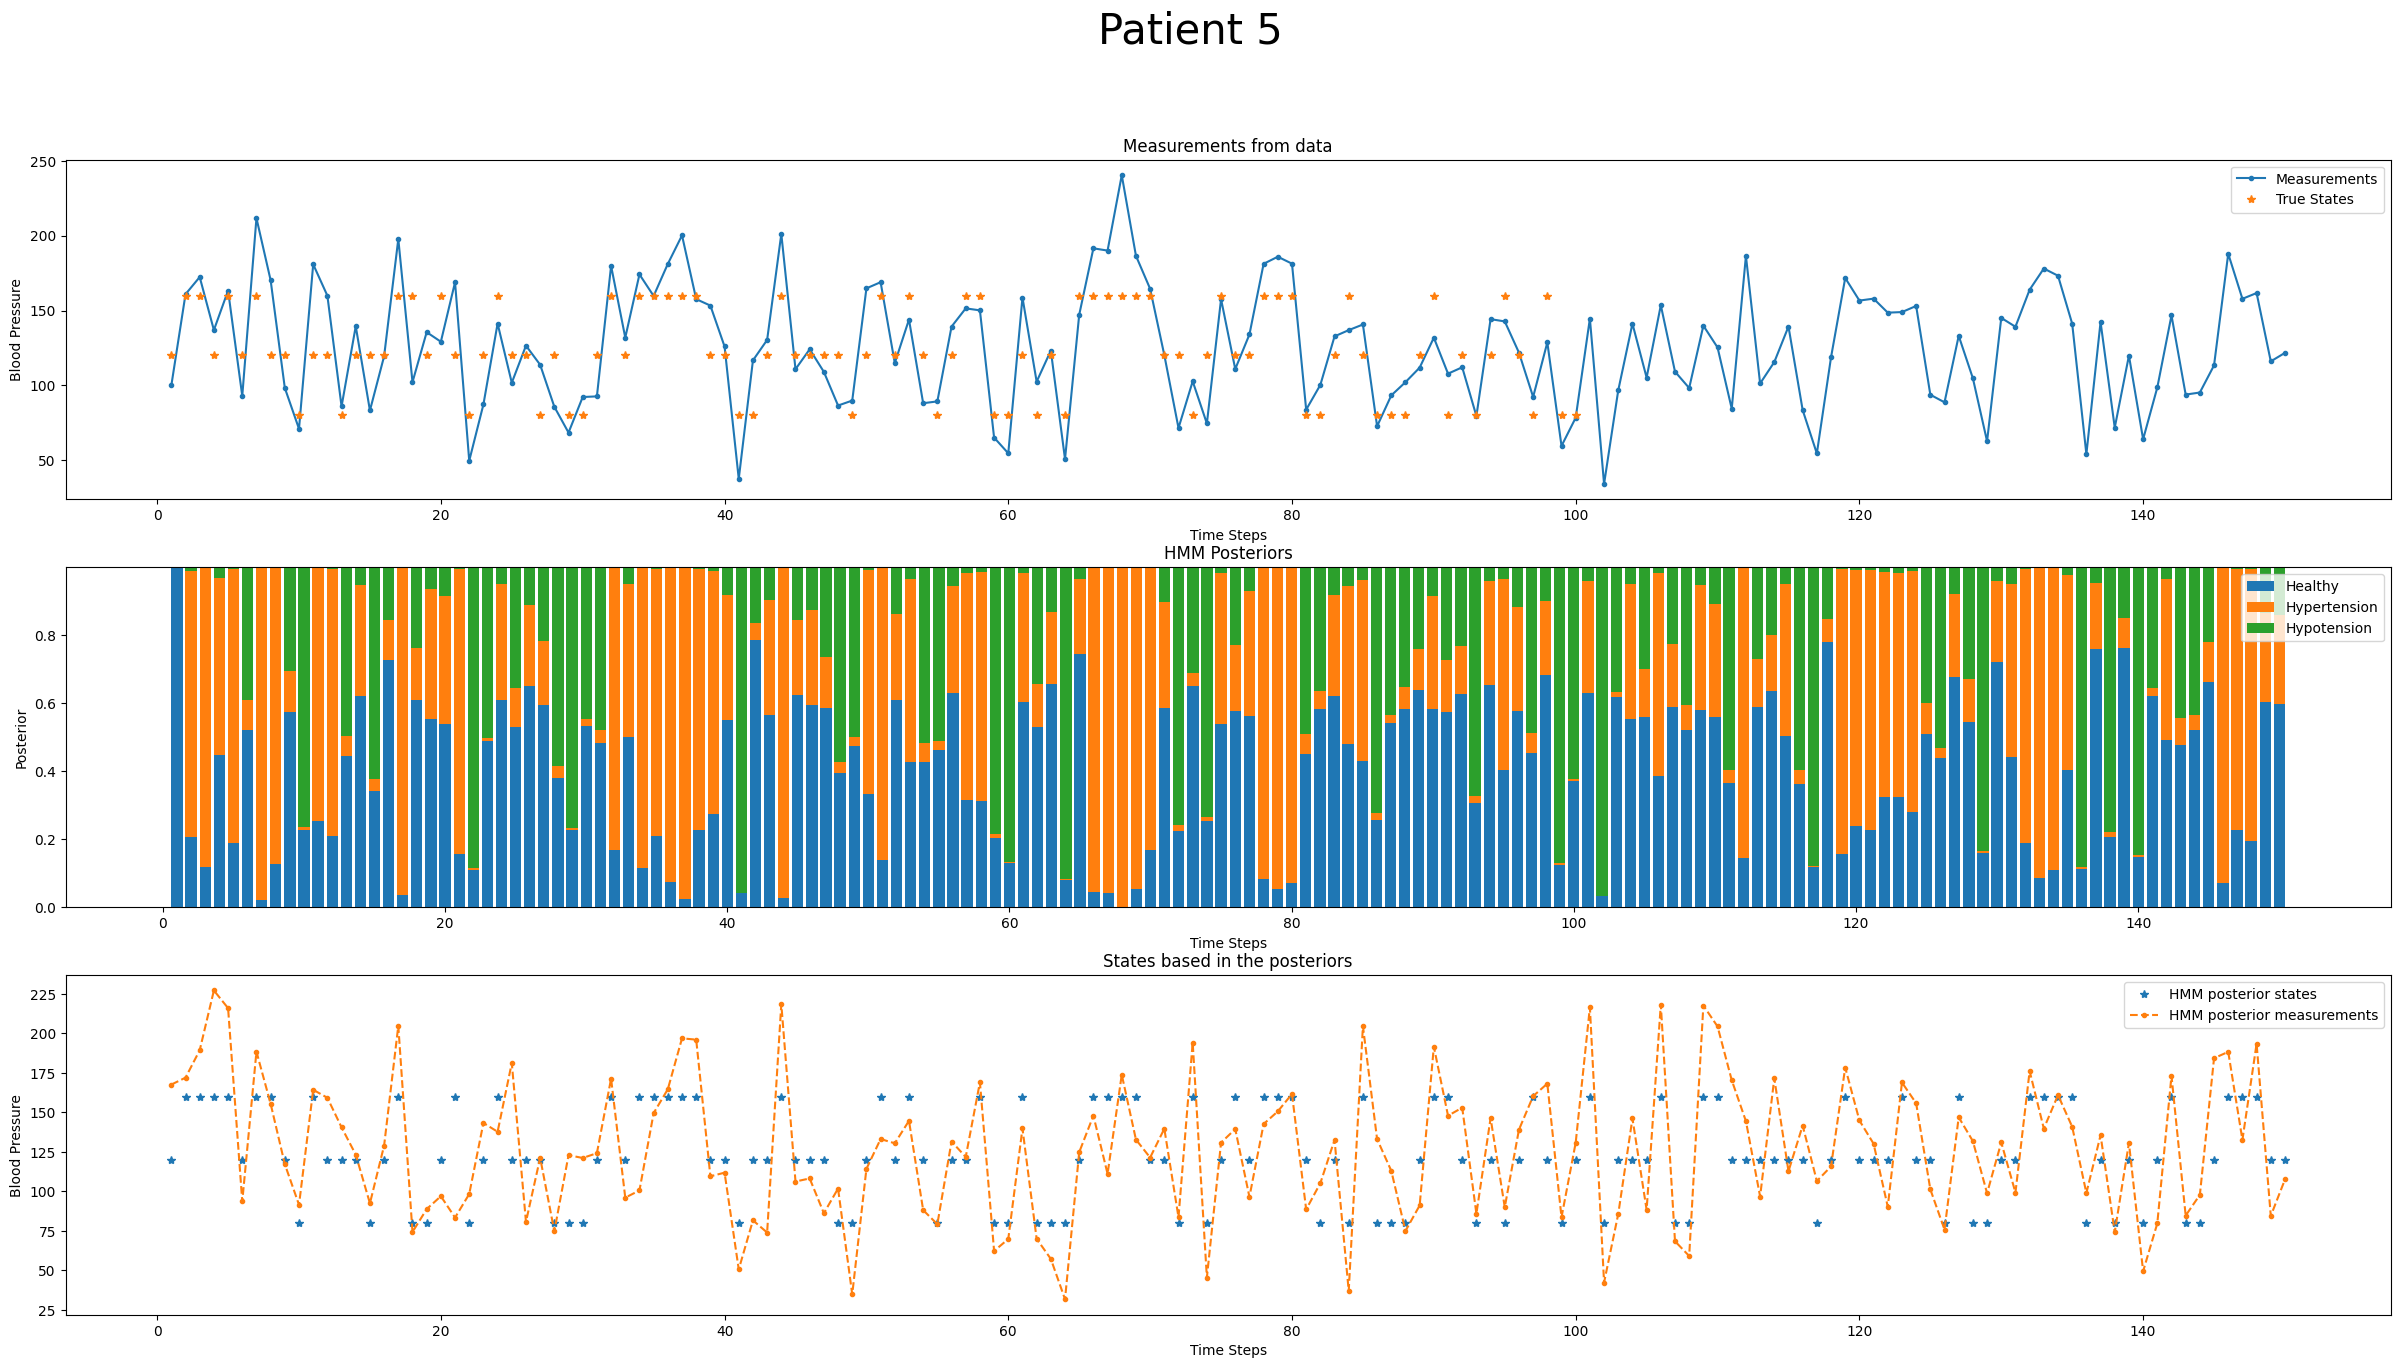

In [99]:
def plot_patient_data(posteriors_HMM, M, posteriors_M, posteriors_S):
    for i in range(5):
        posterior_probs = posteriors_HMM[i]
        measurements = M[i]
        post_M = posteriors_M[i]
        post_S = posteriors_S[i]
        mapping = {'healthy': 120, 'hyper': 160, 'hypo': 80}
        intS = [mapping[item] for item in S[i]]
        
        time_steps = np.linspace(1, len(posterior_probs), len(posterior_probs))
        fig, axs = plt.subplots(3, 1, figsize=(30, 15))

        axs[0].plot(time_steps, measurements, marker='.', linestyle='-', label="Measurements")
        axs[0].plot(time_steps[:100], intS, marker='*', linestyle='none', label="True States")
        axs[0].legend(loc="upper right") 
        axs[0].set_xlabel('Time Steps')
        axs[0].set_ylabel('Blood Pressure')
        axs[0].set_title('Measurements from data') 

        axs[1].bar(time_steps, posterior_probs[:,0], label="Healthy")
        axs[1].bar(time_steps, posterior_probs[:,1], bottom=posterior_probs[:,0], label="Hypertension")
        axs[1].bar(time_steps, posterior_probs[:,2], bottom=posterior_probs[:,0] + posterior_probs[:,1], label="Hypotension")
        axs[1].legend(loc="upper right") 
        axs[1].set_xlabel('Time Steps')
        axs[1].set_ylabel('Posterior')
        axs[1].set_title('HMM Posteriors') 

        axs[2].plot(time_steps, post_S, marker='*', linestyle='none', label="HMM posterior states")
        axs[2].plot(time_steps, post_M, marker='.', linestyle='--', label="HMM posterior measurements")
        axs[2].legend(loc="upper right") 
        axs[2].set_xlabel('Time Steps')
        axs[2].set_ylabel('Blood Pressure')
        axs[2].set_title('States based in the posteriors') 

        fig.suptitle(f'Patient {i + 1}', fontsize=30)

# Generate posteriors
posteriors_M, posteriors_S = generate_posteriors_states(posteriors_HMM, means, var)
# Plot patient data
plot_patient_data(posteriors_HMM, M, posteriors_M, posteriors_S)

## 💊 3. Define an optimal policy (this answer must appear clearly).  

Establishing the potential actions and their corresponding effects, as outlined in the instructions, to facilitate the computation of the optimal policy.

In [100]:
# Probability effect matrix for each action a[i][j] --> i: true state, j: effect (change of state or not)
a_effect = np.array([[0.6, 0, 0.4], [0.8, 0.2, 0], [0, 0, 1]])
b_effect = np.array([[0.6, 0.4, 0], [0, 1, 0], [0.8, 0, 0.2]])
nodrug_effect = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Utility values ['healthy', 'hyper', 'hypo']
utility = np.array([2, -2, -1])

# Cost values 
cost = np.array([-2, -2, 0])

The `policy` function is defined by analyzing posterior probabilities with a specified threshold. If the probability of 'hyper' or 'hypo' exceeds the given threshold, it is inferred as the patient's condition. Otherwise, the patient is deemed healthy.

In [101]:
# action - 0: drug A, 1: drug B, 2: do nothing
def policy(threshold, posterior):
    # if probability of 'not healthy' is considerably high, assume 'healthy'
    if posterior[1] > threshold:
        action = 0  # belief is 'hyper' - drug A
    elif posterior[2] > threshold:
        action = 1  # belief is 'hypo' - drug B
    else:
        action = 2  # patient is 'healthy'

    return action

This function `compute_effect` is designed to simulate the effects of different actions on a patient's state based on the current state and the chosen action. It returns the effect generated by the chosen action and its corresponding impact on the patient's state.

In [102]:
def compute_effect(state, action, seed=0):
    np.random.seed(seed)
    state_map = {'healthy': 0, 'hyper': 1, 'hypo': 2}
    s = state_map.get(state, -1)

    if action == 0:
        # drug A
        effect = np.random.choice([0, 1, 2], p=a_effect[s,:])
    elif action == 1:
        # drug A
        effect = np.random.choice([0, 1, 2], p=b_effect[s,:])
    elif action == 2:
        # do nothing
        effect = np.random.choice([0, 1, 2], p=nodrug_effect[s,:])

    return effect

The `compute_values` function is designed to compute the value associated with a particular action taken.

In [103]:
def compute_values(action, effect):
    value = utility[effect] + cost[action]
    return value

To determine the optimal threshold value for achieving the best policy, several thresholds were tested, and the resulting values were computed to observe their behavior.

In [104]:
def calculate_values_for_thresholds(posteriors_HMM, S, seed=0):
    np.random.seed(seed)
    thresholds = np.linspace(0, 1, 100)
    values = np.zeros((5, 100))

    for i in range(5):
        for j in range(100):
            for k in range(100):
                action = policy(thresholds[k], posteriors_HMM[i][j])
                effect = compute_effect(S[i, j], action)
                values[i, k] += compute_values(action, effect)

    return thresholds, values

thresholds, values = calculate_values_for_thresholds(posteriors_HMM, S)

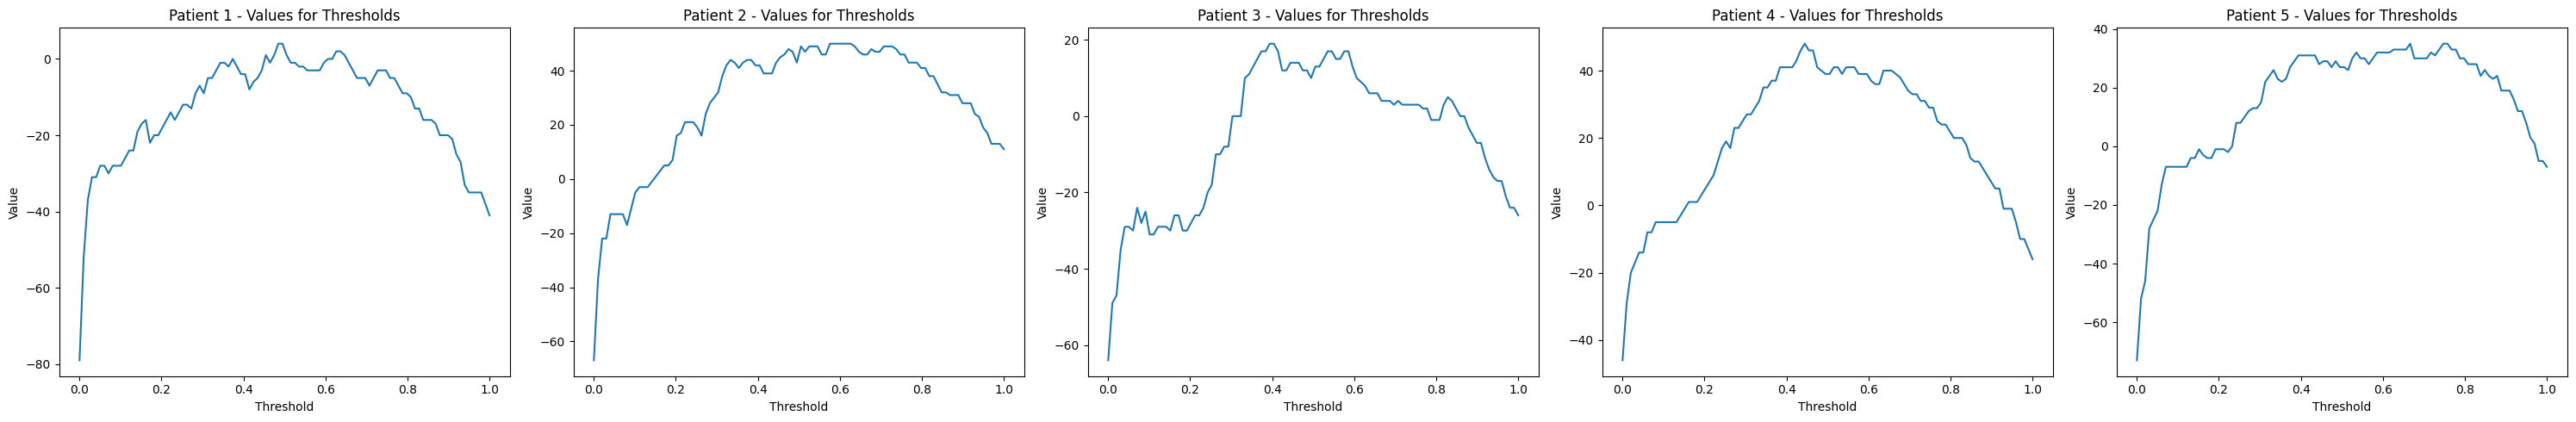

In [105]:
def plot_individual_patient_values(thresholds, values):
    fig, axs = plt.subplots(1, 5, figsize=(30, 5))

    for i in range(5):
        axs[i].plot(thresholds, values[i].T)
        axs[i].set_xlabel('Threshold')
        axs[i].set_ylabel('Value')
        axs[i].set_title(f'Patient {i+1} - Values for Thresholds')

    plt.tight_layout()
    plt.show()

plot_individual_patient_values(thresholds, values)

The `compute_threshold_rankings` function calculates the rankings of thresholds across patients to identify the one that yields the highest cumulative ranking, indicating its effectiveness in achieving the optimal policy. The plot illustrates the cumulative rankings for various thresholds across all patients.

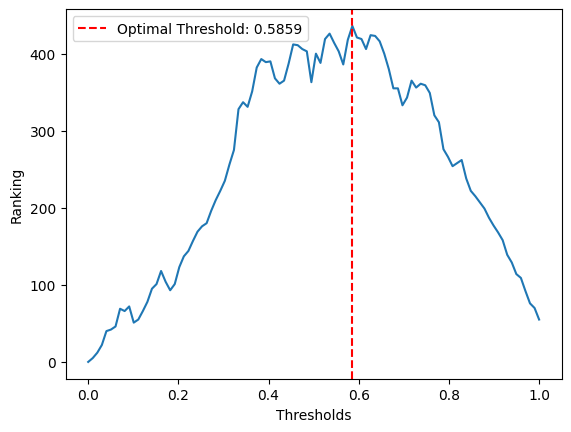

In [106]:
def compute_threshold_rankings(values, thresholds):
    ranking_thresholds = np.zeros((5, 100))  # Initialize an array to store rankings for different thresholds across five patients

    for i in range(len(values)):
        sorted_indices = np.argsort(values[i])
        ranking = np.empty(len(values[i]), dtype=int)
        ranking[sorted_indices] = np.arange(len(values[i]))
        ranking_thresholds[i] = ranking

    plt.plot(thresholds, np.sum(ranking_thresholds, axis=0))
    plt.xlabel('Thresholds')
    plt.ylabel('Ranking')

    optimal_threshold = round(thresholds[np.argmax(np.sum(ranking_thresholds, axis=0))], 4)
    plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold}')
    
    plt.legend()
    plt.show()
    return optimal_threshold

optimal_threshold = compute_threshold_rankings(values, thresholds)

## 4. Based on your policy, determine the drug to take at each time step for the given data.

Using the optimal policy defined above, the `compute_policy_values` function is used to calculate the actions, effects and values from each patient for the first 100 steps.

In [107]:
def compute_policy_values(posteriors_HMM, S, optimal_threshold, postS, seed=0):
    np.random.seed(seed)
    values = np.zeros((5, 100))
    actions = np.zeros((5, 150))
    effects = np.zeros((5, 150))

    for i in range(5):
        for j in range(150):
            action = policy(optimal_threshold, posteriors_HMM[i][j])
            actions[i, j] = action

    for i in range(5):
        for j in range(100):
            action = actions[i, j]
            effect = compute_effect(S[i, j], actions[i, j])
            values[i, j] = compute_values(int(actions[i, j]), int(effect))
            effects[i, j] = effect

        print(f'Patient {i + 1}: {np.sum(values[i, :])}')

    for i in range(5):
        for j in range(100, 150):
            if postS[i][j] == 120:
                #states[i].append('healthy')
                s = 0
            elif postS[i][j] == 160:
                #states[i].append('hyper')
                s = 1
            elif postS[i][j] == 80:
                #states[i].append('hypo')
                s = 2
            effect = compute_effect(s, actions[i, j])
            effects[i, j] = effect

    return values, actions, effects

values_op, actions_op, effects_op = compute_policy_values(posteriors_HMM, S, optimal_threshold, posteriors_S)

Patient 1: -3.0
Patient 2: 50.0
Patient 3: 17.0
Patient 4: 39.0
Patient 5: 32.0


In [108]:
import pandas as pd

def display_actions(actions):
    actions_data = []
    for i in range(len(actions)):
        patient_data = []
        for j in range(len(actions[i])):
            if actions[i, j] == 0:
                action = 'Drug A'
            elif actions[i, j] == 1:
                action = 'Drug B'
            elif actions[i, j] == 2:
                action = '-'
            patient_data.append(action)
        actions_data.append(patient_data)

    # Create a DataFrame to represent the actions data
    df = pd.DataFrame(actions_data, index=[f'Patient {i+1}' for i in range(len(actions))],
                      columns=[f'Time step {j+1}' for j in range(len(actions[0]))])

    return df

display_actions(actions_op)

,Time step 1,Time step 2,Time step 3,Time step 4,Time step 5,Time step 6,Time step 7,Time step 8,Time step 9,Time step 10,...,Time step 141,Time step 142,Time step 143,Time step 144,Time step 145,Time step 146,Time step 147,Time step 148,Time step 149,Time step 150
Patient 1,-,-,-,-,Drug B,-,Drug B,-,-,Drug A,...,Drug B,Drug B,Drug B,Drug B,-,-,Drug A,-,Drug A,Drug A
Patient 2,-,-,Drug B,-,Drug B,-,Drug A,-,-,Drug A,...,-,-,Drug A,-,-,-,-,-,-,-
Patient 3,-,-,Drug B,-,Drug A,-,Drug B,-,Drug A,-,...,Drug A,Drug B,-,Drug A,Drug A,Drug A,-,-,-,Drug A
Patient 4,-,-,-,Drug A,-,-,-,-,-,-,...,-,-,Drug B,-,-,Drug A,Drug A,-,Drug A,Drug A
Patient 5,-,Drug A,Drug A,-,Drug A,-,Drug A,Drug A,-,Drug B,...,-,-,-,-,-,Drug A,Drug A,Drug A,-,-


In [109]:
def display_effects(actions):
    actions_data = []
    for i in range(len(actions)):
        patient_data = []
        for j in range(len(actions[i])):
            if actions[i, j] == 0:
                action = 'healthy'
            elif actions[i, j] == 1:
                action = 'hyper'
            elif actions[i, j] == 2:
                action = 'hypo'
            patient_data.append(action)
        actions_data.append(patient_data)

    # Create a DataFrame to represent the actions data
    df = pd.DataFrame(actions_data, index=[f'Patient {i+1}' for i in range(len(actions))],
                      columns=[f'Time step {j+1}' for j in range(len(actions[0]))])

    return df

display_effects(effects_op)

,Time step 1,Time step 2,Time step 3,Time step 4,Time step 5,Time step 6,Time step 7,Time step 8,Time step 9,Time step 10,...,Time step 141,Time step 142,Time step 143,Time step 144,Time step 145,Time step 146,Time step 147,Time step 148,Time step 149,Time step 150
Patient 1,healthy,hypo,healthy,hyper,healthy,hypo,healthy,healthy,hypo,healthy,...,healthy,healthy,healthy,healthy,hypo,hypo,hypo,hypo,hypo,hypo
Patient 2,healthy,healthy,healthy,hypo,healthy,healthy,healthy,hyper,hyper,healthy,...,hypo,hypo,hypo,hypo,hypo,hypo,hypo,hypo,hypo,hypo
Patient 3,healthy,hypo,healthy,healthy,healthy,hypo,healthy,hyper,healthy,healthy,...,hypo,healthy,hypo,hypo,hypo,hypo,hypo,hypo,hypo,hypo
Patient 4,healthy,healthy,healthy,healthy,healthy,hyper,healthy,hyper,healthy,healthy,...,hypo,hypo,healthy,hypo,hypo,hypo,hypo,hypo,hypo,hypo
Patient 5,healthy,healthy,healthy,healthy,healthy,healthy,healthy,healthy,healthy,healthy,...,hypo,hypo,hypo,hypo,hypo,hypo,hypo,hypo,hypo,hypo


## 5. Discuss the impact of the parameters of the model on the policy and the resulting actions.